In [1]:
#The sns.set_style sets the aesthetics of the plot 
#%config InlineBackend figure_format = ‘retina’  makes the plot higher resolution. 
#%matplotlib inline is a magic function that tells Matplotlib to generate our plots within the frontend 
import pandas as pan
import numpy as npy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'

In [2]:
#reading the file
dia = pan.read_csv('diabetes.csv')

In [3]:
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print(dia.shape)

(768, 9)


In [5]:
#removing duplicates in the rows
dia = dia.drop_duplicates(keep ='first')
print(dia.shape)

(768, 9)


In [6]:
#dropping all the zeros from columns and also dropping all the rows with na in the columns in the list
column = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
dia[column] = dia[column].replace(0,npy.nan)
dia.dropna(subset = column , inplace = True)
dia.shape


(111, 9)

In [7]:
dia.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1.0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1.0
13,1.0,189.0,60.0,23.0,846.0,30.1,0.398,59,1.0
14,5.0,166.0,72.0,19.0,175.0,25.8,0.587,51,1.0
19,1.0,115.0,70.0,30.0,96.0,34.6,0.529,32,1.0
24,11.0,143.0,94.0,33.0,146.0,36.6,0.254,51,1.0
25,10.0,125.0,70.0,26.0,115.0,31.1,0.205,41,1.0
31,3.0,158.0,76.0,36.0,245.0,31.6,0.851,28,1.0
39,4.0,111.0,72.0,47.0,207.0,37.1,1.390,56,1.0
43,9.0,171.0,110.0,24.0,240.0,45.4,0.721,54,1.0


In [8]:
# datatypes in the list
dia.dtypes


Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                     float64
dtype: object

In [9]:
#1.Finding maximum pregnancies having highest insulin in data

maxi_value=dia[['Pregnancies','Insulin']].max()
maxi_value

Pregnancies     17.0
Insulin        846.0
dtype: float64

In [10]:
#2. patients having highest blood pressure
bloo_pre = dia['BloodPressure'].max()
bloo_pre

110.0

In [11]:
#3.Adding a new column to the list if insulin is greter than 90 then the patient have diabetes print true or else false
dia['Diabetes'] = npy.where(dia['Insulin'] >= 90, True , False)
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Diabetes
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1.0,False
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1.0,True
13,1.0,189.0,60.0,23.0,846.0,30.1,0.398,59,1.0,True
14,5.0,166.0,72.0,19.0,175.0,25.8,0.587,51,1.0,True
19,1.0,115.0,70.0,30.0,96.0,34.6,0.529,32,1.0,True


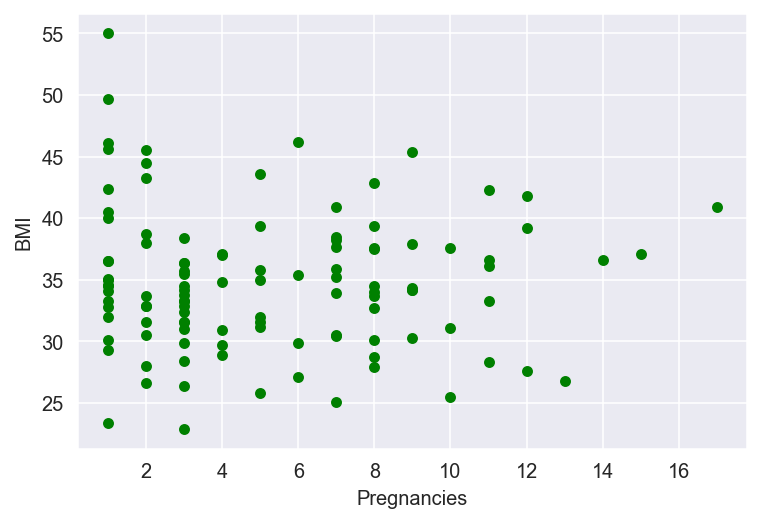

In [12]:
#data visualization
dia.plot(kind = 'scatter',x ='Pregnancies',y='BMI',color='green')
plt.show()

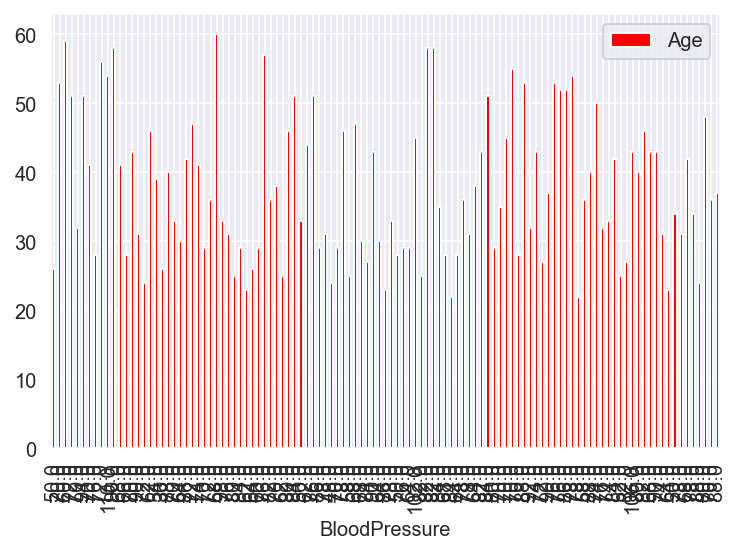

In [13]:
# ploting in bar chart
dia.plot(kind = 'bar',x ='BloodPressure',y='Age',color = 'red')

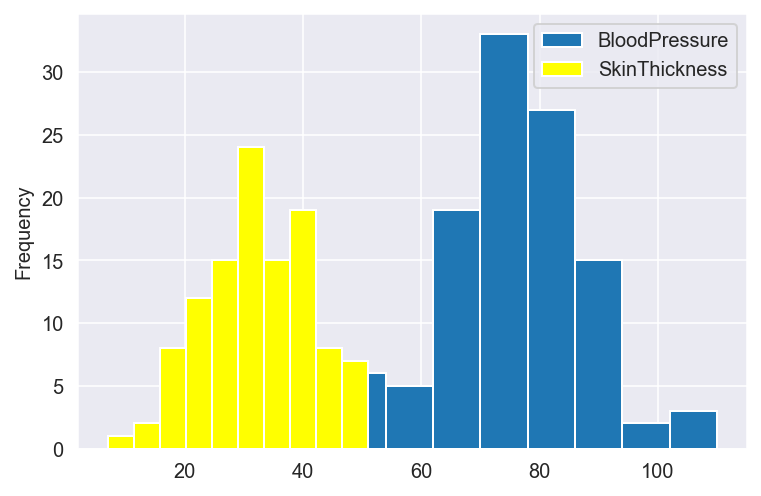

In [14]:
#plotting in histogram chart for multiple columns
ax = plt.gca()
dia.plot(kind = 'hist',x = 'Age', y = 'BloodPressure', ax = ax)
dia.plot(kind = 'hist',x = 'Age', y = 'SkinThickness',color = 'yellow', ax = ax)
plt.show()

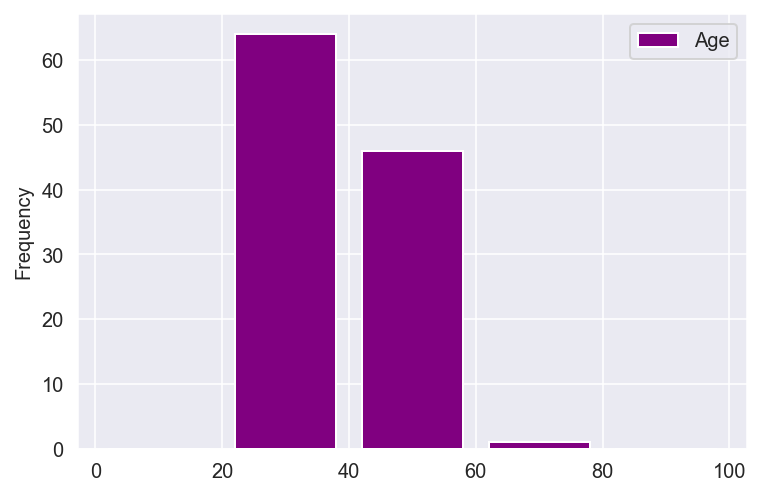

In [15]:
#plot histogram of column Age
dia[['Age']].plot(kind='hist',bins=[0,20,40,60,80,100],rwidth=0.8, color = 'purple')
plt.show()

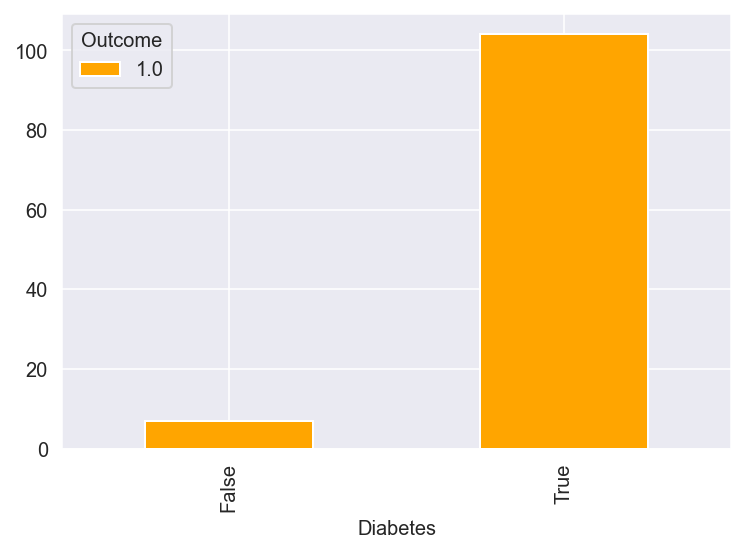

In [16]:
#ploting diabetes in group by
dia.groupby(['Diabetes','Outcome']).size().unstack().plot(kind='bar',stacked=True, color = 'orange')
plt.show()

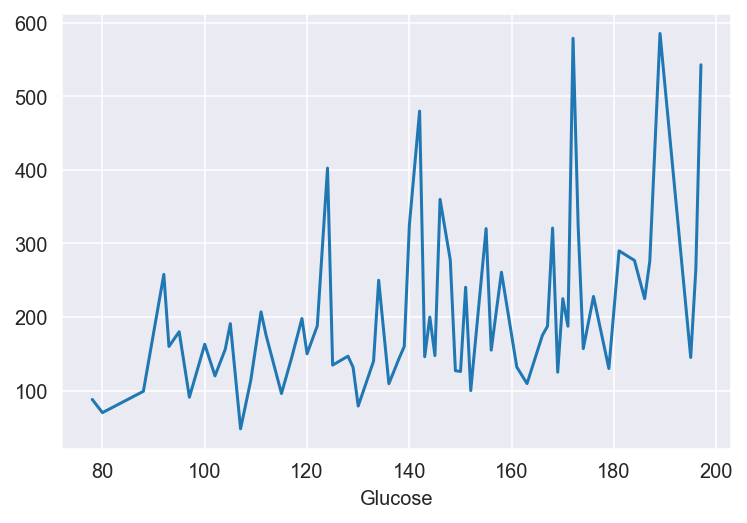

In [17]:
#plotting in mean values
y = dia.groupby('Glucose') ['Insulin'].mean().plot()

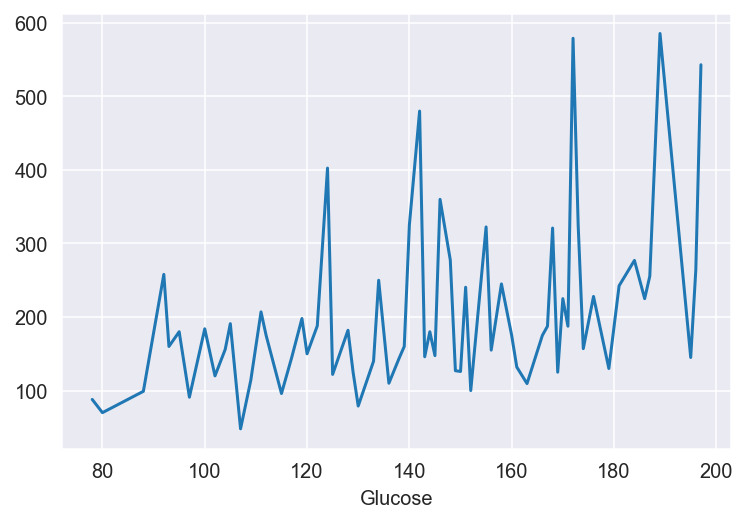

In [18]:
y = dia.groupby('Glucose') ['Insulin'].median().plot()